In [1]:
from collections import Counter
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
data_path = os.path.join('..', 'data')
input_filename = 'clean_organization.csv'

In [3]:
data = pd.read_csv(os.path.join(data_path, input_filename))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (17,25,26,27,28,29,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Prepare the data
We can operate only on numeric features so all the columns that contain non numeric data types
must be exluded.

In [4]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
data.head()

,id,organization_name,cb_rank_(company),number_of_founders,number_of_employees,number_of_funding_rounds,funding_status,last_funding_date,last_funding_amount_currency_(in_usd),last_funding_type,...,industries_group_14,industries_group_15,industries_group_16,n_city,n_country,vc_1,vc_2,vc_3,vc_4,vc_5
0,0,Jones Realty & Construction,1044008.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,1.0,0,0,0,0,0
1,1,Kumatronik,1044013.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
2,2,DOC Developments,1044017.0,0.0,8.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,1.0,0,0,0,0,0
3,3,Peaksmart,1044021.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,9,1.0,0,0,0,0,0
4,4,Reeky Studios,1044022.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0,0,0,0,0


In [5]:
numeric_features = data.select_dtypes(include=np.number).drop(columns='id')
numeric_features.head()

,cb_rank_(company),number_of_founders,number_of_employees,number_of_funding_rounds,funding_status,last_funding_amount_currency_(in_usd),last_funding_type,total_funding_amount_currency_(in_usd),estimated_revenue_range,operating_status,...,industries_group_14,industries_group_15,industries_group_16,n_city,n_country,vc_1,vc_2,vc_3,vc_4,vc_5
0,1044008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0,1.0,0,0,0,0,0
1,1044013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
2,1044017.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0.0,0.0,0.0,0,1.0,0,0,0,0,0
3,1044021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,9,1.0,0,0,0,0,0
4,1044022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0,0.0,0,0,0,0,0


In [6]:
numeric_features = numeric_features.fillna(0)

# Scale features
There are feauters that have very large values like cb_rank and features
that are usually very small like number_of_founders. If they're not transformed to the same scale than features with larger values
will become more important in the algorithm and it's unwanted. Otherwise we could just have delete small value features in the first place.

There are many ways to scale the features, we're going to use a standard scaller which is subtracting the mean from every value of a given feature and dividing it by its standard deviation ($f_i=\frac{f_i-\bar{x}}{s}$).

Other options (to try later):
1. Min-max scaler: it might be problematic with some features as it may result in relatively high values in columns like "number_of_employess" and relatively small in columns like "cb_rank", so effectively it would be the reverse of the original problem.
2. Logarithmic transformation: worth trying later.

In [7]:
scaled_features = StandardScaler().fit_transform(numeric_features)
print("Shape of the scaled features: ", scaled_features.shape)
print("First row of the scaled features: \n", scaled_features[0])

Shape of the scaled features:  (411467, 62)
First row of the scaled features: 
 [ 1.95614362 -0.65693171 -1.00710608 -0.52517028 -0.43883217 -0.03135911
 -0.5091063  -0.04617597 -0.65103946  0.14217953 -0.38333046 -0.37467808
  0.15703845 -0.04657104 -0.49450212 -0.05886358 -0.28028349 -0.5394926
 -0.55436955 -0.37966568 -1.06947429 -0.02012161  0.28693072 -0.64205063
 -0.48300336  0.5868306  -0.20654907 -0.13495446 -0.08753467 -0.05770729
 -0.03679939 -0.02438801 -0.01574661 -0.0065416  -0.00490124 -0.00372471
 -0.00338577 -0.00245447 -0.00282897 -0.64205063 -0.48300336  0.5868306
 -0.20654907 -0.13495446 -0.08753467 -0.05770729 -0.03679939 -0.02438801
 -0.01574661 -0.0065416  -0.00490124 -0.00372471 -0.00338577 -0.00245447
 -0.00282897 -0.44007635 -0.56382626 -0.27844231 -0.21463957 -0.18952615
 -0.17029062 -0.1565148 ]


# Normalize feature vectors
To be able to analyse simialirities between vectors using cosine similarity we have to convert them to unit vectors (vectors of lenght 1).
Simalirty is given by the equation: $cos(\theta)=\frac{ A\cdotp B} {\|A\|\|B\|}$, so if the angle between two vectors is zero meaning that they're perfectly aligned the cosinus of that angle will be 1. When vectors are orthogonal their similarity is 0. When they point at the opposite directions (180 degrees) their similarity is -1 etc. Here's an interactive demo showing cosinus value of a given angle: https://www.mathsisfun.com/algebra/trig-interactive-unit-circle.html

Firstly we'll divde all the vectors by their $L_2$ norms ($\frac{A}{\|A\|}$). This way, when we later calculate a dot product between two vectors the result will be the cosine of the angle between them:  $cos(\theta)=A\cdotp B$ (this is the equation from the previous paragraph without the denominor as the vectors were already divided by their norms).  
A video explaining dot product: https://www.youtube.com/watch?v=LyGKycYT2v0&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=9

In [8]:
normalized_features = Normalizer().fit_transform(scaled_features)
print("Shape of the normalized features: ", normalized_features.shape)
print("First row of the normalized features: \n", normalized_features[0])

Shape of the normalized features:  (411467, 62)
First row of the normalized features: 
 [ 0.56683096 -0.19035884 -0.29182873 -0.15217838 -0.12716022 -0.00908692
 -0.14752353 -0.01338039 -0.18865145  0.04119931 -0.11107752 -0.10857032
  0.04550497 -0.01349487 -0.14329168 -0.01705688 -0.08121763 -0.15632855
 -0.16063944 -0.11001557 -0.30990114 -0.00583063  0.0831438  -0.18604675
 -0.13995969  0.17004567 -0.05985164 -0.0391057  -0.02536489 -0.01672182
 -0.01066335 -0.0070669  -0.00456289 -0.00189556 -0.00142023 -0.00107931
 -0.00098109 -0.00071123 -0.00081975 -0.18604675 -0.13995969  0.17004567
 -0.05985164 -0.0391057  -0.02536489 -0.01672182 -0.01066335 -0.0070669
 -0.00456289 -0.00189556 -0.00142023 -0.00107931 -0.00098109 -0.00071123
 -0.00081975 -0.12752075 -0.16337971 -0.08068412 -0.06219602 -0.05491892
 -0.04934505 -0.04535323]


# Calculating similarities
In fact dot product is suitable for comparing only 2 vectors. We're going to use its extended version that allows comparing a vector with a whole matrix of vectors at once.

In [9]:
query = 'Kumatronik'
query_index = data[data['organization_name'] == query]['id'].values[0]
print(f"We're looking for companies similar to {query} which is in our DB at index {query_index}")

We're looking for companies similar to Kumatronik which is in our DB at index 1


In [10]:
query_vector = normalized_features[query_index]

In [11]:
# Calculates similarities between the query vector and all the feature vectors.
similarities = np.inner(query_vector, normalized_features)

In [12]:
# Sorts indices based on the similarity values (ascending) and then reverse
# so the most similar rows are at the top (descending).
sorted_indices = np.argsort(similarities)[::-1]

In [13]:
# Show the first 10 rows, naturally the query vector is the most similar
# to itself.
data.iloc[sorted_indices[:10]]

,id,organization_name,cb_rank_(company),number_of_founders,number_of_employees,number_of_funding_rounds,funding_status,last_funding_date,last_funding_amount_currency_(in_usd),last_funding_type,...,industries_group_14,industries_group_15,industries_group_16,n_city,n_country,vc_1,vc_2,vc_3,vc_4,vc_5
1,1,Kumatronik,1044013.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
148,148,Tritec GmbH,1045066.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
22374,23271,Best-Computer Support,1034554.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
182748,184542,Connectlounge,1047557.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
112988,113906,Netzwerk Beratung Informationssysteme Duisburg,1061969.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
34422,35322,Explainity,1019575.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
37112,38012,SNP Transformations Deutschland,1030655.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
113051,113969,Hermann Stetter,1062797.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
13442,13442,BASF - Global Industrial Coatings Business,1042075.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0
113142,114060,Sipnetworks.de,1063844.0,0.0,0.0,0.0,0.0,1700-01-01,0.0,0.0,...,0.0,0.0,0.0,0,5.0,0,0,0,0,0


# Explainability
To find out what feauters of two vectors are closest to each other we can simply calculate a difference between them.
Here's where the zero feature values may affect the results. Maybe we should only show features that are not zeros but it's risky.

In [14]:
query_vector = normalized_features[query_index]
some_other_vector = normalized_features[np.random.choice(sorted_indices)]

In [15]:
similarity_importance = some_other_vector * query_vector

In [16]:
sorted_importance_indices = np.argsort(similarity_importance)

In [17]:
most_similar = sorted_importance_indices[:5]
least_similar = sorted_importance_indices[-5:][::-1]

In [18]:
print('Top most and least similar features')
print('Similar:'.ljust(50), 'Different:')
for similar, not_similar in zip(most_similar, least_similar):
    print(numeric_features.columns[similar].ljust(50),
          numeric_features.columns[not_similar])

Top most and least similar features
Similar:                                           Different:
cb_rank_(company)                                  number_of_employees
last_funding_type                                  trend_score_(90_days)
number_of_funding_rounds                           number_of_lead_investors
vc_2                                               industries_2
builtwith_-_active_tech_count                      industries_group_2


# PCA
Reduce dimensionality of vectors, get rid of correlated variables.

In [19]:
pca = PCA(n_components=0.8)
reduced_features = pca.fit_transform(scaled_features)

In [20]:
print(f"We need only {reduced_features.shape[1]} features to explain 80% of variance in the data.") 

We need only 25 features to explain 80% of variance in the data.


In [21]:
absolute_components = np.abs(pca.components_[0])
print("Features sorted by the values in the first (most important) principal component:")
for i, name in enumerate(numeric_features.columns[np.argsort(absolute_components)][::-1]):
    print(i, name)

Features sorted by the values in the first (most important) principal component:
0 number_of_funding_rounds
1 number_of_investors
2 number_of_lead_investors
3 cb_rank_(company)
4 last_equity_funding_type
5 last_funding_type
6 funding_status
7 number_of_founders
8 number_of_employees
9 estimated_revenue_range
10 vc_4
11 vc_5
12 vc_3
13 ipo_status
14 vc_2
15 total_equity_funding_amount_currency_(in_usd)
16 total_funding_amount_currency_(in_usd)
17 vc_1
18 industries_2
19 industries_group_2
20 industries_group_3
21 industries_3
22 industries_4
23 industries_group_4
24 last_equity_funding_amount_currency_(in_usd)
25 industries_1
26 industries_group_1
27 industries_group_5
28 industries_5
29 last_funding_amount_currency_(in_usd)
30 industries_group_6
31 industries_6
32 builtwith_-_active_tech_count
33 trend_score_(90_days)
34 industries_7
35 industries_group_7
36 n_city
37 similarweb_-_page_views_/_visit
38 trend_score_(30_days)
39 industries_8
40 industries_group_8
41 company_type
42 indus

## Visualisation

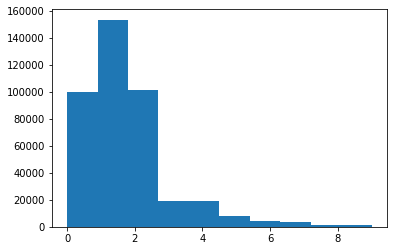

In [22]:
selected_column = 'number_of_employees'
_, bins, _ = plt.hist(numeric_features[selected_column])

In [23]:
limit = 10000
binned  = np.digitize(numeric_features[selected_column], bins)
print(Counter(binned))

Counter({2: 153376, 3: 101500, 1: 99923, 4: 19161, 5: 18780, 6: 8203, 7: 4268, 8: 3602, 9: 1578, 11: 1076})


In [ ]:
two_dimensional_features = TSNE(n_components=2).fit_transform(numeric_features[:limit])

In [ ]:
all_bins = np.unique(binned[:limit])
colors = cm.rainbow(np.linspace(0, 1, len(all_bins)))
for bin_, color in zip(all_bins, colors):
    temp_data = two_dimensional_features[binned[:limit] == bin_]
    plt.scatter(temp_data[:, 0], temp_data[:, 1], color=color, label=bin_)
plt.legend()
plt.title(f'2D representation of the first {limit} rows of the data');

## Similarity calculation using reduced features

In [ ]:
normalized_features = Normalizer().fit_transform(reduced_features)
print("Shape of the normalized features: ", normalized_features.shape)
print("First row of the normalized features: \n", normalized_features[0])

In [ ]:
query = 'Kumatronik'
query_index = data[data['organization_name'] == query]['id'].values[0]
print(f"We're looking for companies similar to {query} which is in our DB at index {query_index}")

In [ ]:
query_vector = normalized_features[query_index]

In [ ]:
# Calculates similarities between the query vector and all the feature vectors.
similarities = np.inner(query_vector, normalized_features)

In [ ]:
# Sorts indices based on the similarity values (ascending) and then reverse
# so the most similar rows are at the top (descending).
sorted_indices = np.argsort(similarities)[::-1]

In [ ]:
# Show the first 10 rows, naturally the query vector is the most similar
# to itself.
data.iloc[sorted_indices[:10]]